# Boston Listings Dataset

### Import libraries and load dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_Boston_listings = pd.read_csv('Boston/listings.csv')
df_Boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [3]:
df_Boston_listings.shape

(3585, 95)

In [4]:
df_Boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [5]:
df_Boston_listings.rename(columns={'id':'listing_id'}, inplace=True)

In [6]:
df_Boston_listings.iloc[0]

listing_id                                                                   12147973
listing_url                                     https://www.airbnb.com/rooms/12147973
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                       Sunny Bungalow in the City
summary                             Cozy, sunny, family home.  Master bedroom high...
space                               The house has an open and cozy feel at the sam...
description                         Cozy, sunny, family home.  Master bedroom high...
experiences_offered                                                              none
neighborhood_overview               Roslindale is quiet, convenient and friendly. ...
notes                                                                             NaN
transit                             The bus stop is 2 

### Explore categorical variables.

In [16]:
df_Boston_listings.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

In [18]:
df_Boston_listings[df_Boston_listings['neighbourhood']!=df_Boston_listings['neighbourhood_cleansed']][['neighbourhood','neighbourhood_cleansed']]

,neighbourhood,neighbourhood_cleansed
3,NaN,Roslindale
6,NaN,Roslindale
19,NaN,Roslindale
23,NaN,Roslindale
36,NaN,Roslindale
54,NaN,Roslindale
64,NaN,Jamaica Plain
88,NaN,Jamaica Plain
94,NaN,Jamaica Plain
150,NaN,Jamaica Plain


In [7]:
cat_cols=df_Boston_listings.select_dtypes(exclude=['int64', 'float64']).columns

last_scraped
2016-09-07    3585
Name: last_scraped, dtype: int64


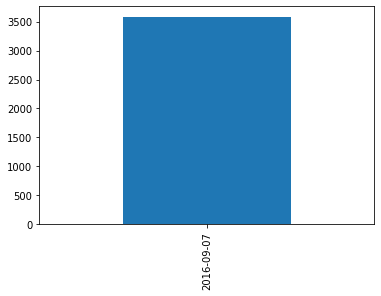

experiences_offered
none    3585
Name: experiences_offered, dtype: int64


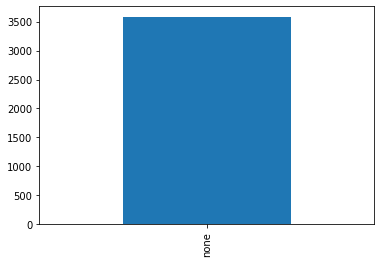

host_response_time
within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64


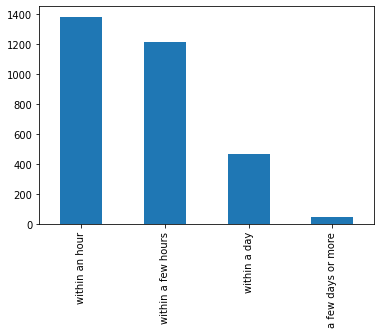

host_is_superhost
f    3178
t     407
Name: host_is_superhost, dtype: int64


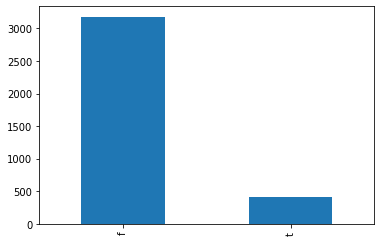

host_has_profile_pic
t    3577
f       8
Name: host_has_profile_pic, dtype: int64


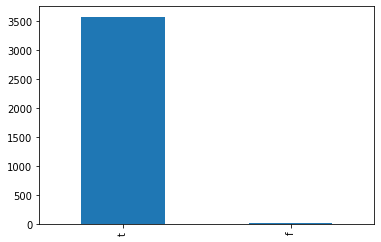

host_identity_verified
t    2603
f     982
Name: host_identity_verified, dtype: int64


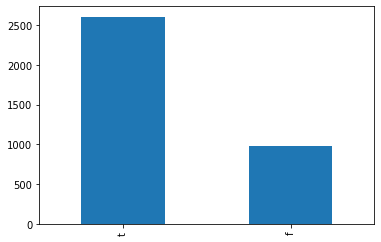

state
MA    3585
Name: state, dtype: int64


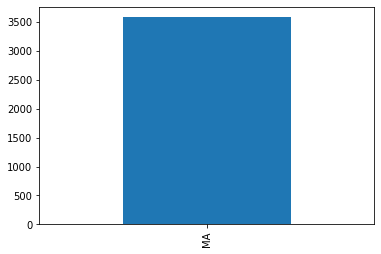

market
Boston                   3568
San Francisco               1
Other (Domestic)            1
Other (International)       1
Name: market, dtype: int64


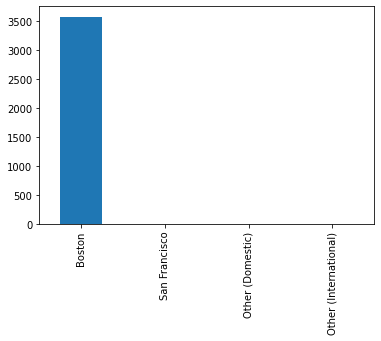

country_code
US    3585
Name: country_code, dtype: int64


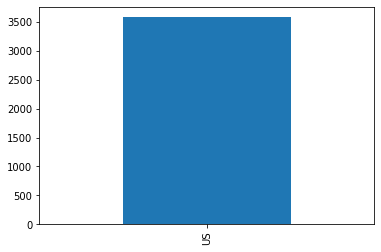

country
United States    3585
Name: country, dtype: int64


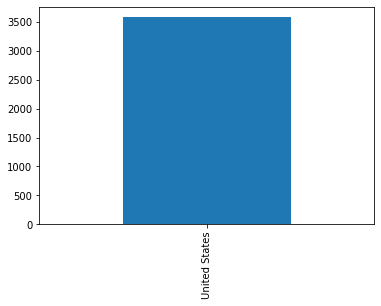

is_location_exact
t    3080
f     505
Name: is_location_exact, dtype: int64


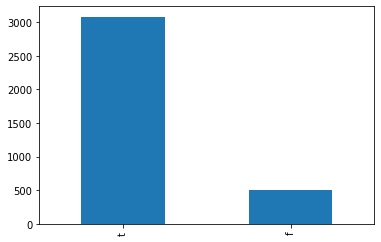

property_type
Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64


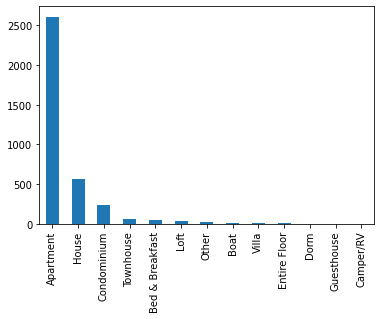

room_type
Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


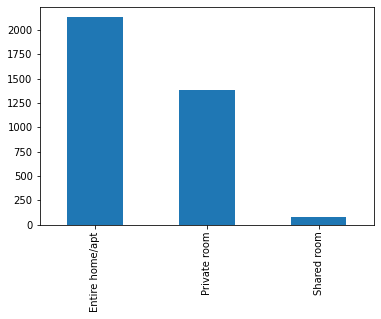

bed_type
Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64


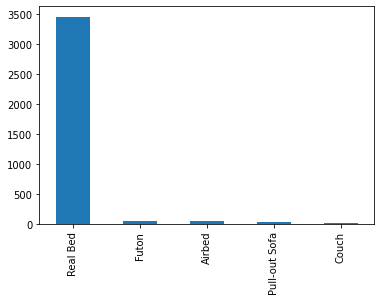

calendar_last_scraped
2016-09-06    3585
Name: calendar_last_scraped, dtype: int64


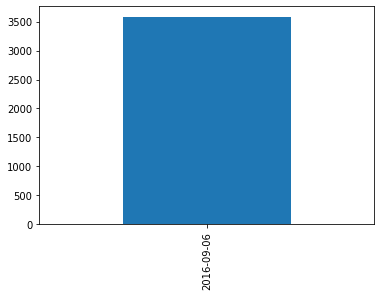

requires_license
f    3585
Name: requires_license, dtype: int64


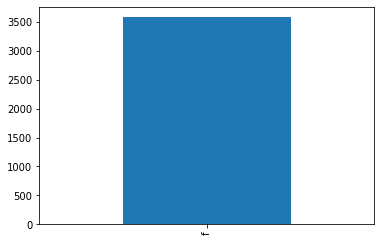

instant_bookable
f    2991
t     594
Name: instant_bookable, dtype: int64


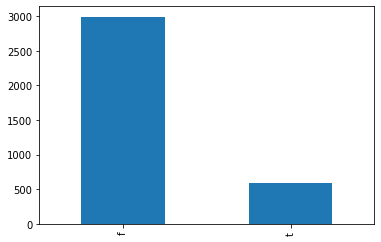

cancellation_policy
strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64


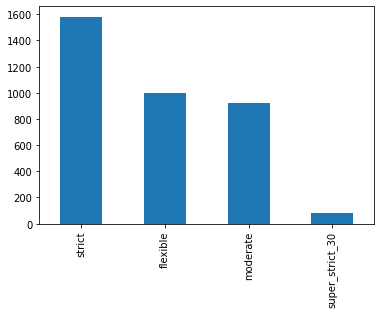

require_guest_profile_picture
f    3518
t      67
Name: require_guest_profile_picture, dtype: int64


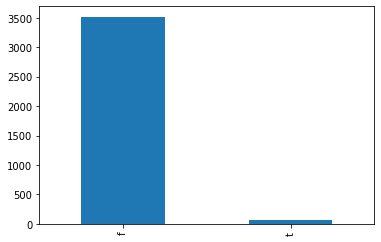

require_guest_phone_verification
f    3348
t     237
Name: require_guest_phone_verification, dtype: int64


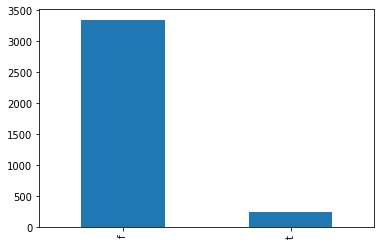

In [8]:
for col in cat_cols:
    if len(df_Boston_listings[col].unique())<20:
        print(col)
        print(df_Boston_listings[col].value_counts())
        df_Boston_listings[col].value_counts().plot.bar()
        plt.show()

In [9]:
# Replace 't', 'f' with 1, 0

tf_cols=[] # True/False columns
for col in cat_cols:
    if {'t', 'f'}.issubset(set(df_Boston_listings[col].unique())):
        tf_cols.append(col)
        df_Boston_listings[col].replace({'t':1, 'f':0}, inplace=True)

df_Boston_listings[tf_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0,1,0,1,0,0,0
1,0,1,1,1,1,0,0
2,1,1,1,1,0,1,0
3,0,1,0,0,0,0,0
4,1,1,1,1,0,0,0


In [10]:
# Convert rates from string to float

rate_cols=df_Boston_listings.columns[df_Boston_listings.columns.str.contains('rate')]
df_Boston_listings[rate_cols]=df_Boston_listings[rate_cols].apply(lambda x: x.str.replace('%', '').astype(float)/100)
df_Boston_listings[rate_cols].head()

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,1.0,1.00
2,1.0,0.88
3,1.0,0.50
4,1.0,1.00


In [15]:
# 1-value columns
# Drop columns having only one unique value

dropped_cols=[]

for col in df_Boston_listings:
    if len(df_Boston_listings[col].unique())==1:
        df_Boston_listings.drop(columns=col, inplace=True)
        dropped_cols.append(col)

dropped_cols

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'neighbourhood_group_cleansed',
 'state',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names']

### Check for duplicates (rows/columns).

In [11]:
len(df_Boston_listings[df_Boston_listings.duplicated()])

0

In [12]:
# Check if there is a difference between the 'host_listings_count' and 'host_total_listings_count', or they are duplicates
df_Boston_listings[df_Boston_listings['host_listings_count']!=df_Boston_listings['host_total_listings_count']]

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [13]:
# Drop 'host_total_listings_count' column as it's a duplicate
df_Boston_listings.drop(columns='host_total_listings_count', inplace=True)

### Drop columns with high percentages of null values.

In [15]:

def null_columns(df, show=True, drop_percent=0.98):
    null_percent=pd.DataFrame(df.isnull().sum()/df.shape[0]).reset_index()
    null_percent.columns=['Col. Name', 'Null Percent']
    null_percent.sort_values('Null Percent', ascending=False, inplace=True)
    col_to_drop=list(null_percent[null_percent['Null Percent']>drop_percent]['Col. Name'])
    if show:
        print(null_percent)
    
    return col_to_drop

In [16]:
null_columns(df_Boston_listings)

                           Col. Name  Null Percent
69                  has_availability      1.000000
86                           license      1.000000
39      neighbourhood_group_cleansed      1.000000
87                jurisdiction_names      1.000000
58                       square_feet      0.984379
61                     monthly_price      0.752301
60                      weekly_price      0.751185
62                  security_deposit      0.625662
10                             notes      0.550907
13                       interaction      0.433473
12                            access      0.415342
9              neighborhood_overview      0.394700
24                        host_about      0.365132
11                           transit      0.359833
14                       house_rules      0.332497
63                      cleaning_fee      0.308787
6                              space      0.294840
79            review_scores_accuracy      0.229568
83            review_scores_loc

['has_availability',
 'license',
 'neighbourhood_group_cleansed',
 'jurisdiction_names',
 'square_feet']

In [17]:
# Drop columns with null values more than 98%
df_Boston_listings.drop(columns=null_columns(df_Boston_listings, show=False), inplace=True)

### Convert Price columns to float instead of Object.

In [18]:
price_columns=[]
for col in list(df_Boston_listings.select_dtypes(exclude=['int64', 'float64']).columns):
    #print(col)
    if df_Boston_listings[col].str.contains('$', regex=False).any():
        if not df_Boston_listings[col].str.contains('[A-Za-z]', regex=True).any():
            price_columns.append(col)
            print(col)

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people


In [19]:
# This alternative will work only for columns having 'price' included in the name
#price_columns=df_Boston_listings.columns[df_Boston_listings.columns.str.contains('price')]
#price_columns

In [33]:
df_Boston_listings[price_columns]=df_Boston_listings[price_columns].apply(lambda x:x.str.replace('[$, ]','')).astype(float)
df_Boston_listings[price_columns].head()

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,250.0,NaN,NaN,NaN,35.0,0.0
1,65.0,400.0,NaN,95.0,10.0,0.0
2,65.0,395.0,1350.0,NaN,NaN,20.0
3,75.0,NaN,NaN,100.0,50.0,25.0
4,79.0,NaN,NaN,NaN,15.0,0.0


### Create a new feature 'price_per_accommodate'

In [34]:
df_Boston_listings[df_Boston_listings['accommodates']==0]

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [35]:
df_Boston_listings['price'].dtype

dtype('float64')

In [36]:
df_Boston_listings['price_per_accommodate']=df_Boston_listings['price']/df_Boston_listings['accommodates']

### Final look at the numerical features

In [37]:
numerical=df_Boston_listings.select_dtypes(include=['int64', 'float64'])
numerical.head()

,listing_id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_accommodate
0,12147973,20160906204935,31303940,1,42.282619,-71.133068,4,1.5,2.0,3.0,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,62.50
1,3075044,20160906204935,2572247,1,42.286241,-71.134374,2,1.0,1.0,1.0,65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30,32.50
2,6976,20160906204935,16701,1,42.292438,-71.135765,2,1.0,1.0,1.0,65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47,32.50
3,1436513,20160906204935,6031442,1,42.281106,-71.121021,4,1.0,1.0,2.0,75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00,18.75
4,7651065,20160906204935,15396970,1,42.284512,-71.136258,2,1.5,1.0,2.0,79.0,NaN,NaN,NaN,15.0,1,0.0,2,31,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25,39.50


In [38]:
numerical.describe()

,listing_id,scrape_id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_accommodate
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,3585.000000,892.000000,888.000000,1342.000000,2478.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585.000000,2829.000000,3585.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,173.925802,922.392377,3692.097973,324.698212,68.380145,1.429847,10.886192,3.171269,2.872584e+04,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,12.733891,1.970908,62.786246
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,148.331321,657.821817,2899.963733,328.873075,51.297835,1.056787,19.137773,8.874133,1.670136e+06,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,29.415076,2.120561,54.900654
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,10.000000,80.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000,5.000000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,85.000000,466.750000,1600.000000,100.000000,25.000000,1.000000,0.000000,1.000000,3.650000e+02,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.480000,37.500000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,150.000000,750.000000,2925.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.170000,51.666667
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,220.000000,1200.000000,5000.000000,450.000000,100.000000,1.000000,20.000000,3.000000,1.125000e+03,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.720000,75.000000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,4000.000000,5000.000000,40000.000000,4500.000000,300.000000,14.000000,200.000000,300.000000,1.000000e+08,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000,1372.000000


### Split Amenities into separate columns.

In [39]:
df_Boston_listings['amenities'] = df_Boston_listings['amenities'].str.replace('[{}"]','')

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [40]:
amenities = df_Boston_listings['amenities'].str.get_dummies(sep=',')
df_Boston_listings.drop(columns='amenities')
df_Boston_listings=pd.concat([df_Boston_listings, amenities], axis=1)
df_Boston_listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am lik

# Boston Calendar Dataset

In [52]:
df_Boston_calendar = pd.read_csv('Boston/calendar.csv')
df_Boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [53]:
df_Boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [54]:
df_Boston_calendar['date']=pd.to_datetime(df_Boston_calendar['date'])
df_Boston_calendar['price']=df_Boston_calendar['price'].str.replace('[$, ]','').astype(float)
df_Boston_calendar['month']=df_Boston_calendar.date.dt.month
df_Boston_calendar['year']=df_Boston_calendar.date.dt.year
df_Boston_calendar['month-year']=df_Boston_calendar.date.dt.strftime('%m-%Y')
df_Boston_calendar.info()

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
 4   month       1308890 non-null  int64         
 5   year        1308890 non-null  int64         
 6   month-year  1308890 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 69.9+ MB


In [55]:
df_Boston_calendar.head()

,listing_id,date,available,price,month,year,month-year
0,12147973,2017-09-05,f,NaN,9,2017,09-2017
1,12147973,2017-09-04,f,NaN,9,2017,09-2017
2,12147973,2017-09-03,f,NaN,9,2017,09-2017
3,12147973,2017-09-02,f,NaN,9,2017,09-2017
4,12147973,2017-09-01,f,NaN,9,2017,09-2017
